In [1]:
from setup_env import setup_environment

setup_environment()

In [2]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from project.machine_learning.classifier import ClassifierJudge
from project.machine_learning.model_mc import ModelMC
from project.wfc.factory import Factory
from project.wfc.grid import Grid, Rect
from project.wfc.history import History
from project.wfc.judge import RandomJudge, Judge
from project.config import DATA_SOURCE
from project.wfc.wfc import WFC

In [3]:
sns.set_style("whitegrid")
sns.set_context("paper")

In [4]:
factory = Factory(DATA_SOURCE)
patterns = factory.create_patterns()

INFO - Validation Result: success



In [5]:
def evaluate_wfc(
    sizes: np.ndarray, target_successes: int, judge: Judge, name: str
) -> pd.DataFrame:
    results = []

    for size in tqdm(sizes):
        rect = Rect(width=size, height=size)
        grid = Grid(rect=rect, patterns=patterns)
        history = History(capacity=-1)
        wfc = WFC(grid=grid, judge=judge, history=history)

        successes = 0
        tries = 0

        while successes < target_successes:
            is_succeeded = False

            while not is_succeeded:
                tries += 1
                generation_data = wfc.generate()
                is_succeeded = generation_data.success

            successes += 1

        mean_tries = tries / target_successes
        results.append({"model": name, "size": size**2, "mean_tries": mean_tries})

    return pd.DataFrame(results)

In [9]:
sizes = np.arange(2, 12)
sizes = [5, 10, 15, 20]
target_successes = 100

In [7]:
random_judge = RandomJudge()

wfc_df = evaluate_wfc(sizes, target_successes, random_judge, "Classic WFC")

wfc_df.head(5)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:58<00:00,  5.81s/it]


,model,size,mean_tries
0,Classic WFC,4,1.01
1,Classic WFC,9,1.04
2,Classic WFC,16,1.32
3,Classic WFC,25,1.33
4,Classic WFC,36,1.80


In [ ]:
random_judge = RandomJudge()

wfc_df = evaluate_wfc(sizes, target_successes, random_judge, "Classic WFC")

wfc_df.head(5)

 50%|█████     | 2/4 [00:15<00:17,  8.90s/it]

In [8]:
wfc_df

,model,size,mean_tries
0,Classic WFC,4,1.00
1,Classic WFC,9,1.01
2,Classic WFC,16,1.05
3,Classic WFC,25,1.09
4,Classic WFC,36,1.17
5,Classic WFC,49,1.28
6,Classic WFC,64,1.46
7,Classic WFC,81,1.60
8,Classic WFC,100,1.74
9,Classic WFC,121,2.08


In [9]:
dt_judge = ClassifierJudge(view=Rect(width=5, height=5), threshold=0.8, rebalance=True)
dt_judge.load_weights("weights/decision_tree.pkl")

wfcwdt_df = evaluate_wfc(sizes, target_successes, dt_judge, "WFC with Decision Tree")

wfcwdt_df.head(5)

100%|██████████| 10/10 [00:57<00:00,  5.78s/it]


,model,size,mean_tries
0,WFC with Decision Tree,4,1.00
1,WFC with Decision Tree,9,1.02
2,WFC with Decision Tree,16,1.29
3,WFC with Decision Tree,25,1.26
4,WFC with Decision Tree,36,2.17


In [14]:
knn_judge = ClassifierJudge(view=Rect(width=5, height=5), threshold=0.5, rebalance=True)
knn_judge.load_weights("weights/k-nearest_neighbors.pkl")

wfcknn_df = evaluate_wfc(sizes, target_successes, knn_judge, "WFC with kNN")

wfcknn_df.head(5)

100%|██████████| 10/10 [08:00<00:00, 48.07s/it] 


,model,size,mean_tries
0,WFC with kNN,4,1.01
1,WFC with kNN,9,1.07
2,WFC with kNN,16,1.24
3,WFC with kNN,25,1.36
4,WFC with kNN,36,1.87


In [15]:
logreg_judge = ClassifierJudge(view=Rect(width=5, height=5), threshold=0.8, rebalance=True)
logreg_judge.load_weights("weights/logistic_regression.pkl")

wfclog_df = evaluate_wfc(sizes, target_successes, logreg_judge, "WFC with LogReg")

wfclog_df.head(5)

100%|██████████| 10/10 [00:52<00:00,  5.29s/it]


,model,size,mean_tries
0,WFC with LogReg,4,1.01
1,WFC with LogReg,9,1.03
2,WFC with LogReg,16,1.13
3,WFC with LogReg,25,1.38
4,WFC with LogReg,36,1.85


In [17]:
forest_judge = ClassifierJudge(view=Rect(width=5, height=5), threshold=0.5, rebalance=True)
forest_judge.load_weights("weights/random_forest.pkl")

wfcrf_df = evaluate_wfc(sizes, target_successes, forest_judge, "WFC with RF")

wfcrf_df.head(5)

100%|██████████| 10/10 [12:10<00:00, 73.01s/it] 


,model,size,mean_tries
0,WFC with RF,4,1.00
1,WFC with RF,9,1.04
2,WFC with RF,16,1.22
3,WFC with RF,25,1.41
4,WFC with RF,36,1.79


In [18]:
svm_judge = ClassifierJudge(view=Rect(width=5, height=5), threshold=0.5, rebalance=True)
svm_judge.load_weights("weights/svm_(linear).pkl")

wfcsvm_df = evaluate_wfc(sizes, target_successes, svm_judge, "WFC with SVM")

wfcsvm_df.head(5)

100%|██████████| 10/10 [02:34<00:00, 15.47s/it]


,model,size,mean_tries
0,WFC with SVM,4,1.01
1,WFC with SVM,9,1.03
2,WFC with SVM,16,1.13
3,WFC with SVM,25,1.37
4,WFC with SVM,36,2.10


In [8]:
mc_judge = ModelMC(view=Rect(3, 3))
mc_judge.load_weights("data/weights/wfcwmc/mmc_1000")

wfcwmc_df = evaluate_wfc(sizes, target_successes, mc_judge, "WFCWMC")

wfcwmc_df.head(5)

100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


,model,size,mean_tries
0,WFCWMC,4,1.00
1,WFCWMC,9,1.02
2,WFCWMC,16,1.06
3,WFCWMC,25,1.08
4,WFCWMC,36,1.16


In [14]:
evaluation_df = pd.concat([wfc_df, wfcwdt_df]).reset_index(drop=True)

In [19]:
evaluation_df = pd.concat([wfc_df, wfcwdt_df, wfcknn_df, wfclog_df, wfcrf_df, wfcsvm_df]).reset_index(drop=True)

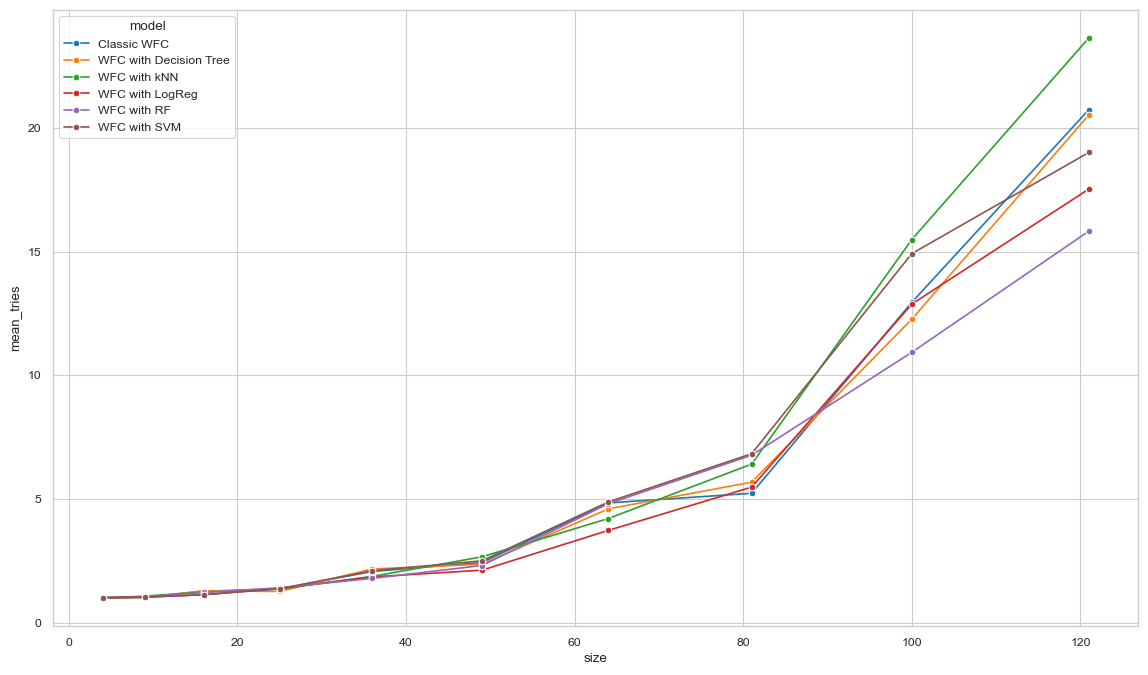

In [22]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=evaluation_df, x="size", y="mean_tries", hue="model", marker="o")
plt.savefig("content/performance.png", bbox_inches="tight")